<img src="images/logo.png" style="width: 100px;"/>
<h1><center>Assignment 9</center></h1>
<h3><center>Second graded assignment</center></h3>

<center>Due: 11.02.2022 at 23:59</center>

### How to upload:

Upload your solution via the VC course. Please upload **one Zip archive** per group. The Zip must contain:
* Your solution **notebook** (a **.ipynb** file)
* A **data folder** with the datasets (you probably don't have to change anything here)

Your Zip should be named after the following scheme:

* "**yourname**"\_assignment\_"**number**"\_submission.zip


### Please use coding comments!!!
### 50 Points in total

# A) Preprocessing (15 points)

A very big part of a data scientist's work is analysing and preprocessing data to be able to fit models on it. Since we haven't done this intensively in the past, we will focus on teaching you some core competences in the upcoming task. Be aware: This is just the tip of the iceberg! There are many more methods out there to preprocess data and every data set needs own bouquet of preprocessing methods.

This time we'll look at data on forest fires in a region of Portugal. Source: https://archive.ics.uci.edu/ml/datasets/Forest+Fires

__Task 1 (1 point):__ Your first task is to go to the source website and have a look at it. On the website you can find a definition of the attributes. Briefly explain what the values of X, Y and area stand for.

*Your answer here*
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. area - the burned area of the forest (in ha): 0.00 to 1090.84

__Task 2 (5 points):__ Let's do some data anaylsis. You are free to experiment here to get the best overview of the data. Make yourself familiar with it. Make sure to cover at least the following aspects:
* Import the data set "forestfires.csv" from the data folder and call it `data`
* Have a first look at the data and display it in the print out
* Use some methods to get an overview over the numerical data (something like a min, max, median etc. for every column would be nice)
* Re-encode the "area" variable in a binary way (0/1) such that you have a variable "fire" in the end which states whether there was a fire or not
* Is your data set balanced? You can find this out by calculating the proportion of observations with (without) fires
* To get an even better overview of the data generate a pairplot (library seaborn) like in assignment 8

In [11]:
# Your code here
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("data/forestfires.csv")

#print and show data
print(data.shape)
data.head()

#min, max, [median = 50%]
df = pd.DataFrame(data)
df.describe()

#re-encode area in fire column
df['fire'] = np.where(df['area']!= 0.0, 1, 0)
df.head()



(517, 13)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,fire
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0


__Task 3 (3 points):__ Let's create a heatmap. Heatmaps are a powerful tool to visualize three dimensional numerical data so that you can get a very quick overview. We now want to know in which areas of Portugal we had the most recorded forest fires. For this task you will use the seaborn function "heatmap". These steps might help you:
* group the data by the variables X and Y
* sum up the values of "fire" by the groups (*Hint: resetting the index and giving it a name helps*)
* Your table now should have three columns ["X","Y","name of sum e.g. counts"]
* transform this table via the function "pivot()"
* Use seaborn.heatmap() to plot the heatmap; look at the documentation to find parameters which will make the heatmap look pleasing

In [ ]:
# Your code here

__Task 4 (1 point):__ Do you get a good idea of the fire distribution by only looking at the counts? Explain briefly why or why not. If not, what value should you rather plot in a heatmap?

In [ ]:
# Your code and answer

__Task 5 (2 points):__ If your main goal will be to predict whether an area suffered from forest fires or not by using KNN, why would you want to re-encode the "month" and the "day" variable? In what way would you propose to re-encode them? Please write a function to apply your idea for the "month" variable.

In [ ]:
# Your code and answer here

We will now drop the "day" column and then split the data into x_data and y_data. If your data is still called "data" you can use the code below otherwise please modify to your variable names.     
After that we rescale all our x_data with the MinMaxScaler from sklearn.

In [ ]:
x_data = data.drop(columns = ["fire","day"])
y_data = data["fire"]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_data[x_data.columns] = scaler.fit_transform(x_data)

x_data.head()

__Task 6 (1 point):__ What is the difference beteween the MinMaxScaler and StandardScaler? Why did we use the former here?

*Your solution here*

__Task 7 (2 points):__ Apply a KNN classification with `k`=100, `weights` = "distance" and a 5-fold cross validation to the dataset. Use `KNeighborsClassifier` and `cross_val_score` from sklearn for this.
Evaluate the accuracy scores. Would you say that KNN is a suitable algorithm to predict forest fires on this data set?

*Hint: The given parameters to run the KNN on are one of the best parameter combinations we found.*

In [ ]:
# Your code and answer here

# Task B) KNN and Cross Validation (16 points)

Now we want you to apply another dataset to KNN. The Breast-Cancer dataset is already preprocessed, so you can start right away. Its target variable splits into "1" persons having breast cancer and "0" persons not having breast cancer. Here is a glimpse:

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,0.708333,0,1.000000,0.481132,0.244292,1,0,0.603053,0,0.370968,0.0,0.0,1
1,0.166667,0,0.666667,0.339623,0.283105,0,1,0.885496,0,0.564516,0.0,0.0,1
2,0.250000,1,0.333333,0.339623,0.178082,0,0,0.770992,0,0.225806,1.0,0.0,1
3,0.562500,0,0.333333,0.245283,0.251142,0,1,0.816794,0,0.129032,1.0,0.0,1
4,0.583333,1,0.000000,0.245283,0.520548,0,1,0.702290,1,0.096774,1.0,0.0,1
5,0.583333,0,0.000000,0.433962,0.150685,0,1,0.587786,0,0.064516,0.5,0.0,1
6,0.562500,1,0.333333,0.433962,0.383562,0,0,0.625954,0,0.209677,0.5,0.0,1


(303, 13)


<AxesSubplot:xlabel='target', ylabel='count'>

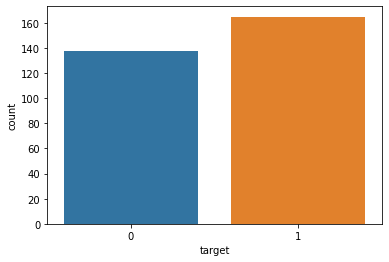

In [117]:
import pandas as pd
# from html import HTML
import matplotlib.pyplot as plt
import seaborn as sns # for data visualiztions

data = pd.read_csv("data/breast_cancer_pre.csv")
# display(HTML("<h3>Breast Cancer Pre-Processed:</h3>"))
display(data.head(7))
print(data.shape)
sns.countplot(x="target", data = data)


In [112]:
x_data = data.drop(columns="target")
y_data = data["target"]

__Task 1 (1 point):__ Split the data into train and test set with a `test_size` of 0.2 and a `random_state` of 42. 

In [113]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

__Task 2 (2 points):__ You have already used k-fold cross validation in the last task. Explain what it does, and why we use it. What does it return, and how can you interpret the results?

k-fold cross validation:

The original sample is randomly partitioned into k subsets or folds of equal size. Of the k subsets, a single subset is retained as the validation data for testing the model, and the remaining k − 1 subsets are used as training data. The cross-validation process is then repeated k times, with each of the k subsamples used exactly once as the validation data.

Why we use k-fold cross validation?

We use it for evaluating a model’s performance and for hyperparameter tuning


What does k-fold cross validation return, and how can you interpret the results?

This provides k measures of predictive performance, and we can then analyze their mean and standard deviation.


__Task 3 (4 points):__ We want to train a KNN classifier for the given data. But we do not know how to set the hyperparameters. Your task now is to perform a *grid search* to find optimal values for `k` and `weights`. For `k`, consider every value in the the range $ [1, 25] $, and for `weights` consider the values `"uniform"` and `"distance"`. For each possible hyperperameter combination, perform a k-fold cross validation with 10 folds. Select one hyperparameter setting you determine to be best, and explain why you think this is the best one.

**Note:** There is a function in sklearn that automatically performs a grid search for you. **Please do not use this**, but implement the grid search yourself. You can, however, use the sklearn implementation for k-fold-cross-validation and for the KNN classifier.

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
import operator

#For k, considering every value in the the range  [1,25]
n_neighbors = list(range(1, 26))

#for weights considering the values "uniform" and "distance"
weights = ['uniform','distance']

n_neighbors = list(range(1, 26))
weights = ['uniform','distance']
avg_scores = {}
for k in n_neighbors:
    for weight in weights:
        knn = KNeighborsClassifier(n_neighbors = k, weights = weight)
        scores = cross_val_score(knn, x_data, y_data, cv=10)
        #taking mean score of the cross_val_score in a dictionary
        avg_scores["k="+str(k)+", weight="+weight] = scores.mean()

#getting maximum score from the dictionary
print(max(avg_scores.items(), key=operator.itemgetter(1))[0])

k=4, weight=distance


We will use k = `4` and weight as `"distance"` becaue we performed a grid search to find optimal values for k and weights. Here we used k-fold cross validation and this one hyperparameter has the highest score.  

__Task 4 (1 point):__ Explain the difference between `uniform` and `distance` weights in the context of KNN.

`uniform` assigns no weight, while `distance` weighs points by the inverse of their distances meaning nearer points will have more weight than the farther points.

__Task 5 (1 point):__ Now train your final model with KNN using the best hyperparameters you found in Task 3. 

In [120]:
# 1. Create the KNN classifier
knn = KNeighborsClassifier(n_neighbors = 4, weights = 'distance')

# 2. Train (Fit) the KNN classifier with our training data
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

__Task 6 (2 points):__ Evaluate your model against the test set. Print out the accuracy and interpret it. 

In [121]:
# Evaluating model against the test set
y_pred = knn.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# Displaying the confusion matrix
print()
print("{:<19}{:^18}".format('', 'Ground Truth'))
print("{:<10}|{:^9}|{:^9}|{:^9}|".format('', '', 'Positive', 'Negative'))
print("{:<10}|{:<9}|{:^9}|{:^9}|".format('Prediction', 'Positive', tp, fp))
print("{:<10}|{:<9}|{:^9}|{:^9}|".format('', 'Negative', fn, tn))

Accuracy:  0.8360655737704918

                      Ground Truth   
          |         |Positive |Negative |
Prediction|Positive |   24    |    2    |
          |Negative |    8    |   27    |


__Task 7 (1 points):__ Explain the residual in terms of KNN. What is it? How to calculate it?

Residual is the error $\hat f(x) − f (x)$ in approximating the target function. Nearest neighbor approaches can be thought of as approximating the target function at the single query point $x_{q}$. The distance between this target function and the measerd values scattered around this target function is residual.

It can be calculated using $\hat f(x) − f (x)$.

__Task 8 (1 point):__ What does "curse of dimensionality" in the context of KNN mean? How can you solve the problem when working with KNN?

"Curse of Dimensionality" in the context of KNN:

The KNN algorithm hinges on data points being close together. This becomes challenging as the number of dimensions increases, referred to as the “Curse of Dimensionality.” It’s especially hard for the KNN algorithm it requires two points to be very close on every axis, and adding a new dimension creates another opportunity for points to be farther apart. As the number of dimensions increases, the closest distance between two points approaches the average distance between points, eradicating the ability of the k-nearest neighbors algorithm to provide valuable predictions.

Solution of the "Curse of Dimensionality" when working with KNN:

To overcome this challenge, we can add more data to the data set. By doing so we add density to the data space, bringing the nearest points closer together and returning the ability of the KNN algorithm to provide valuable predictions. This is a valuable solution so long as we have the hardware needed to perform computations on our data set. As our data set gets larger and larger, we need more and more computing power to process it. Eventually the size of our data set will surpass our computing power. At that point, we need to use dimensionality reduction to present all of the valuable information in fewer dimensions.

__Task 9 (3 points):__ Think of all the machine learning models that you've learned during the semester. Which one would also be fit for this type of data? Name the model and explain why you would choose exactly this one.

Binary classification refers to those classification tasks that have two class labels. The breast cancer dataset has two class, "1" persons having breast cancer and "0" persons not having breast cancer.

Typically, binary classification tasks involve one class that is the normal state and another class that is the abnormal state. It is common to model a binary classification task with a model that predicts a Bernoulli probability distribution for each example.

The Bernoulli distribution is a discrete probability distribution that covers a case where an event will have a binary outcome as either a 0 or 1. For classification, this means that the model predicts a probability of an example belonging to class 0, or the abnormal state 1.

The algorithm that will also fit this type of data:

    2. Decision Trees
    3. Support Vector Machines
    4. Naive Bayes

# Task C) Reinforcement Learning in the Wumpus World (19 points)

The Wumpus world is a traditional toy domain to test intelligent agents. The world consists of a 2D grid where each cell contains at most one token. There are empty cells (denoted as 'E'), pits ('P'), the evil Wumpus ('W') and a pot of gold ('G'). An agent ('A') has to find its way through the Wumpus world and ideally reach the gold. The agent can only move to horizontally or vertically adjacent cells (not diagonally). If the agent enters a cell with either the Wumpus or a pit, it dies. So long story short: Gold good, pits and Wumpus bad.

We want to find an ideal strategy for an agent that is placed at a random starting cell in the Wumpus world. We will accomplish this with reinforcement learning.

Let us first import useful libraries:

In [1]:
import numpy as np # for the arrays
from time import sleep # for controlling the speed of animations
import wumpus_utils as wu # some utility functions that might come in handy. You will have to install the package 'ipycanvas' with the guide given here: https://ipycanvas.readthedocs.io/en/latest/installation.html

The following code snipped creates a fresh Wumpus world $M$ with the tokens explained above. Notice that there is no agent at the beginning:

In [2]:
# the wumpus world (no agent at the beginning)
world = [["E", "E", "P", "E"],
         ["W", "E", "G", "E"],
         ["E", "E", "E", "P"],
         ["E", "P", "E", "E"]]
world = np.array(world)

# for cleaner reference, get the number of rows and columns of our world:
num_rows = world.shape[0]
num_cols = world.shape[1]

We also want to have a visual reference of the current state of the world. The *wumpus_utils* provide a nice functionality for that. The function *draw_world(wumpus_world, agent_pos=None)* draws the current world behind the scenes given a world in the style of above. An optional *agent_pos* in the form of a list __[agent_row, agent_col]__ can also later draw a world with the agent included. The function *display_world()* finally displays the drawn world in the notebook. Keep in mind, that once you display the world with *display_world()*, all other calls of *display_world()* will just spawn a clone of the underlying canvas at the place in the notebook you executed the call. So it is sufficient to call *display_world* only once at one place in the notebook and this display will then be changed if you redraw the world. If you decide to have multiple displays, then all clones will be altered synchronously.

In [3]:
wu.draw_world(world)
wu.display_world()

RoughCanvas(height=200, width=200)

We now want to establish the rewards that an agent should receive if it enters a cell with a particular token. The reward dictionary given below indicates the rewards for each token $t$ (e.g. $reward(t==P) = -1000$).

We are only interested in the token the agent finds when it enters into a cell (not where the agent came from). This means, we can establish a reward matrix $R$ that has the same size as the world and where $R_{rc} = reward(M_{rc})$.

__Task 1 (3 points):__ Fill the reward matrix by respecting the world $M$ given above and the reward dictionary given below.

In [4]:
reward_dict = { # the expected reward when finding the respective token
    "E": -1,
    "P": -1000,
    "W": -1000,
    "G": 1000
}

reward_matrix = np.zeros(shape=(num_rows, num_cols), dtype=np.int16) # our rewards will always be integers

####################
# TODO implement here
for idx, x in np.ndenumerate(world):
    reward_matrix[idx] = reward_dict[x]  
####################
      
print(reward_matrix)

[[   -1    -1 -1000    -1]
 [-1000    -1  1000    -1]
 [   -1    -1    -1 -1000]
 [   -1 -1000    -1    -1]]


__Task 2 (1 point):__ What could be the rationale behind giving a reward of '-1' every time the agent enters an empty cell?

*Your solution here*

Now we of course want to apply Q-learning to our world. First, some hyperparameters and the initialized Q-value-matrix (all zeros) is given. The Q-value-matrix is designed as follows: For each possible action in the world a value is saved. A possible action from the agent can be going either north, east, south or west (in our implementation, if it is not possible to go in a particular direction (border cells), the respective value just stays zero). The first two dimensions of the matrix is the position of the agent. The last dimension is the direction of the move (index 0 = north, index 1 = east, index 2 = south, index 3 = west). If e.g. there is a value of 42 at *q_value_matrix[2][3][0]*, that means that the q-value of the action of being at row 2, column 3 and going north is 42.

In [7]:
gamma = 0.8 # the decay paramater
num_episodes = 100 # the number of episodes
pause_val = 0.01 # the time in seconds that is used as a pause between frames for the animation
q_value_matrix = np.zeros(shape=(num_rows, num_cols, 4), dtype=np.int16) # the Q-value-matrix

__Task 3 (10 points):__ Below you find a stub for simulating multiple episodes of an agent walking through the world. Do not change existing code lines or their order! Your job is to implement the Q-learning algorithm that you have learned in the lecture and practice to find Q-values for all possible actions. We use the *draw_world* feature explained above to always show the current situation. You can either duplicate the display of the world again here or have a look at the changing world drawn above.

Use the stub below to implement the algorithm from the lecture to find the q-values. Train for the number of episodes stated above with the given gamma value. Make sure that your agent does not randomly walk out of the world. You can make *pause_val* smaller for faster animation.

In [ ]:
wu.display_world()

for episode in range(num_episodes):
    print("Start of episode", episode)
    
    # let us place the agent randomly in the world such that it does not start in an unempty cell
    agent_pos = [np.random.randint(num_rows), np.random.randint(num_cols)] # the position of the agent represented as a list [row, column]
    while not world[agent_pos[0]][agent_pos[1]] == "E": # find a new position for the agent as long as it is not placed in an empty cell
        agent_pos = [np.random.randint(num_rows), np.random.randint(num_cols)]
    
    # draw the initial world with the agent
    wu.draw_world(world, agent_pos)
    # Hold the execution for a given amount of seconds
    sleep(pause_val)
    
    goal_reached = False
    while not goal_reached: # while the agent has not stepped in an unempty cell
        
        ####################
        # TODO implement updating your q-value-matrix here
        ####################
        
        if not world[agent_pos[0]][agent_pos[1]] == "E": # End the current episode if the agent has stepped in an unempty cell
            goal_reached = True
        
        # draw the current situation and wait for a given amount in seconds.
        wu.draw_world(world, agent_pos)
        sleep(pause_val)

print(q_value_matrix)

__Task 4 (3 points)__ You now have trained strategies for your agent, such that it knows where to go next in each cell. Now implement the following function *follow_strategy(agent_pos)* that takes the position of an agent in [row,col] fashion and executes the learned strategy until a goal is reached. Again do not change existing code lines or their order!

In [ ]:
pause_val = 1 # make the animation a bit slower

def follow_strategy(agent_pos):
    if not world[agent_pos[0]][agent_pos[1]] == "E": # check if the agent started on a non-empty cell
        return
    
    goal_reached = False
    while not goal_reached:
        
        ####################
        # TODO implement here
        ####################
        
        if not world[agent_pos[0]][agent_pos[1]] == "E":
            goal_reached = True

        wu.draw_world(world, agent_pos)
        sleep(pause_val)

agent_pos = [1, 0]
wu.draw_world(world, agent_pos=agent_pos)
wu.display_world()
sleep(pause_val)
follow_strategy(agent_pos)

__Task 5 (2 points):__ Shortly describe in your own words what the impact of either a small or big gamma value would be on your learning of the Wumpus world.

*Your solution here*